Decision tree

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
file_name = 'dataset/drug200.csv'
!wget -O $file_name https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-05-18 11:37:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5,9K) [text/csv]
Saving to: ‘dataset/drug200.csv’

dataset/drug200.csv 100%[===================>]   5,89K  --.-KB/s    in 0s      

2020-05-18 11:37:38 (364 MB/s) - ‘dataset/drug200.csv’ saved [6027/6027]



In [48]:
df = pd.read_csv(file_name)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [49]:
# convert string values to numerical representation
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
df['Sex'] = le_sex.transform(df['Sex'])

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
df['BP'] = le_BP.transform(df['BP'])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
df['Cholesterol'] = le_Chol.transform(df['Cholesterol']) 

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [87]:
X = df.loc[:, df.columns != 'Drug']
Y = df['Drug']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [88]:
# create model
drug_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drug_tree.fit(x_train, y_train)
y_hat = drug_tree.predict(x_test)

In [89]:
# evaluation
from sklearn import metrics
print("DecisionTrees's accuracy: ", metrics.accuracy_score(y_test, y_hat))
print("DecisionTrees's accuracy: ", drug_tree.score(x_test, y_test))

DecisionTrees's accuracy:  1.0
DecisionTrees's accuracy:  1.0


In [94]:
# visualization
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

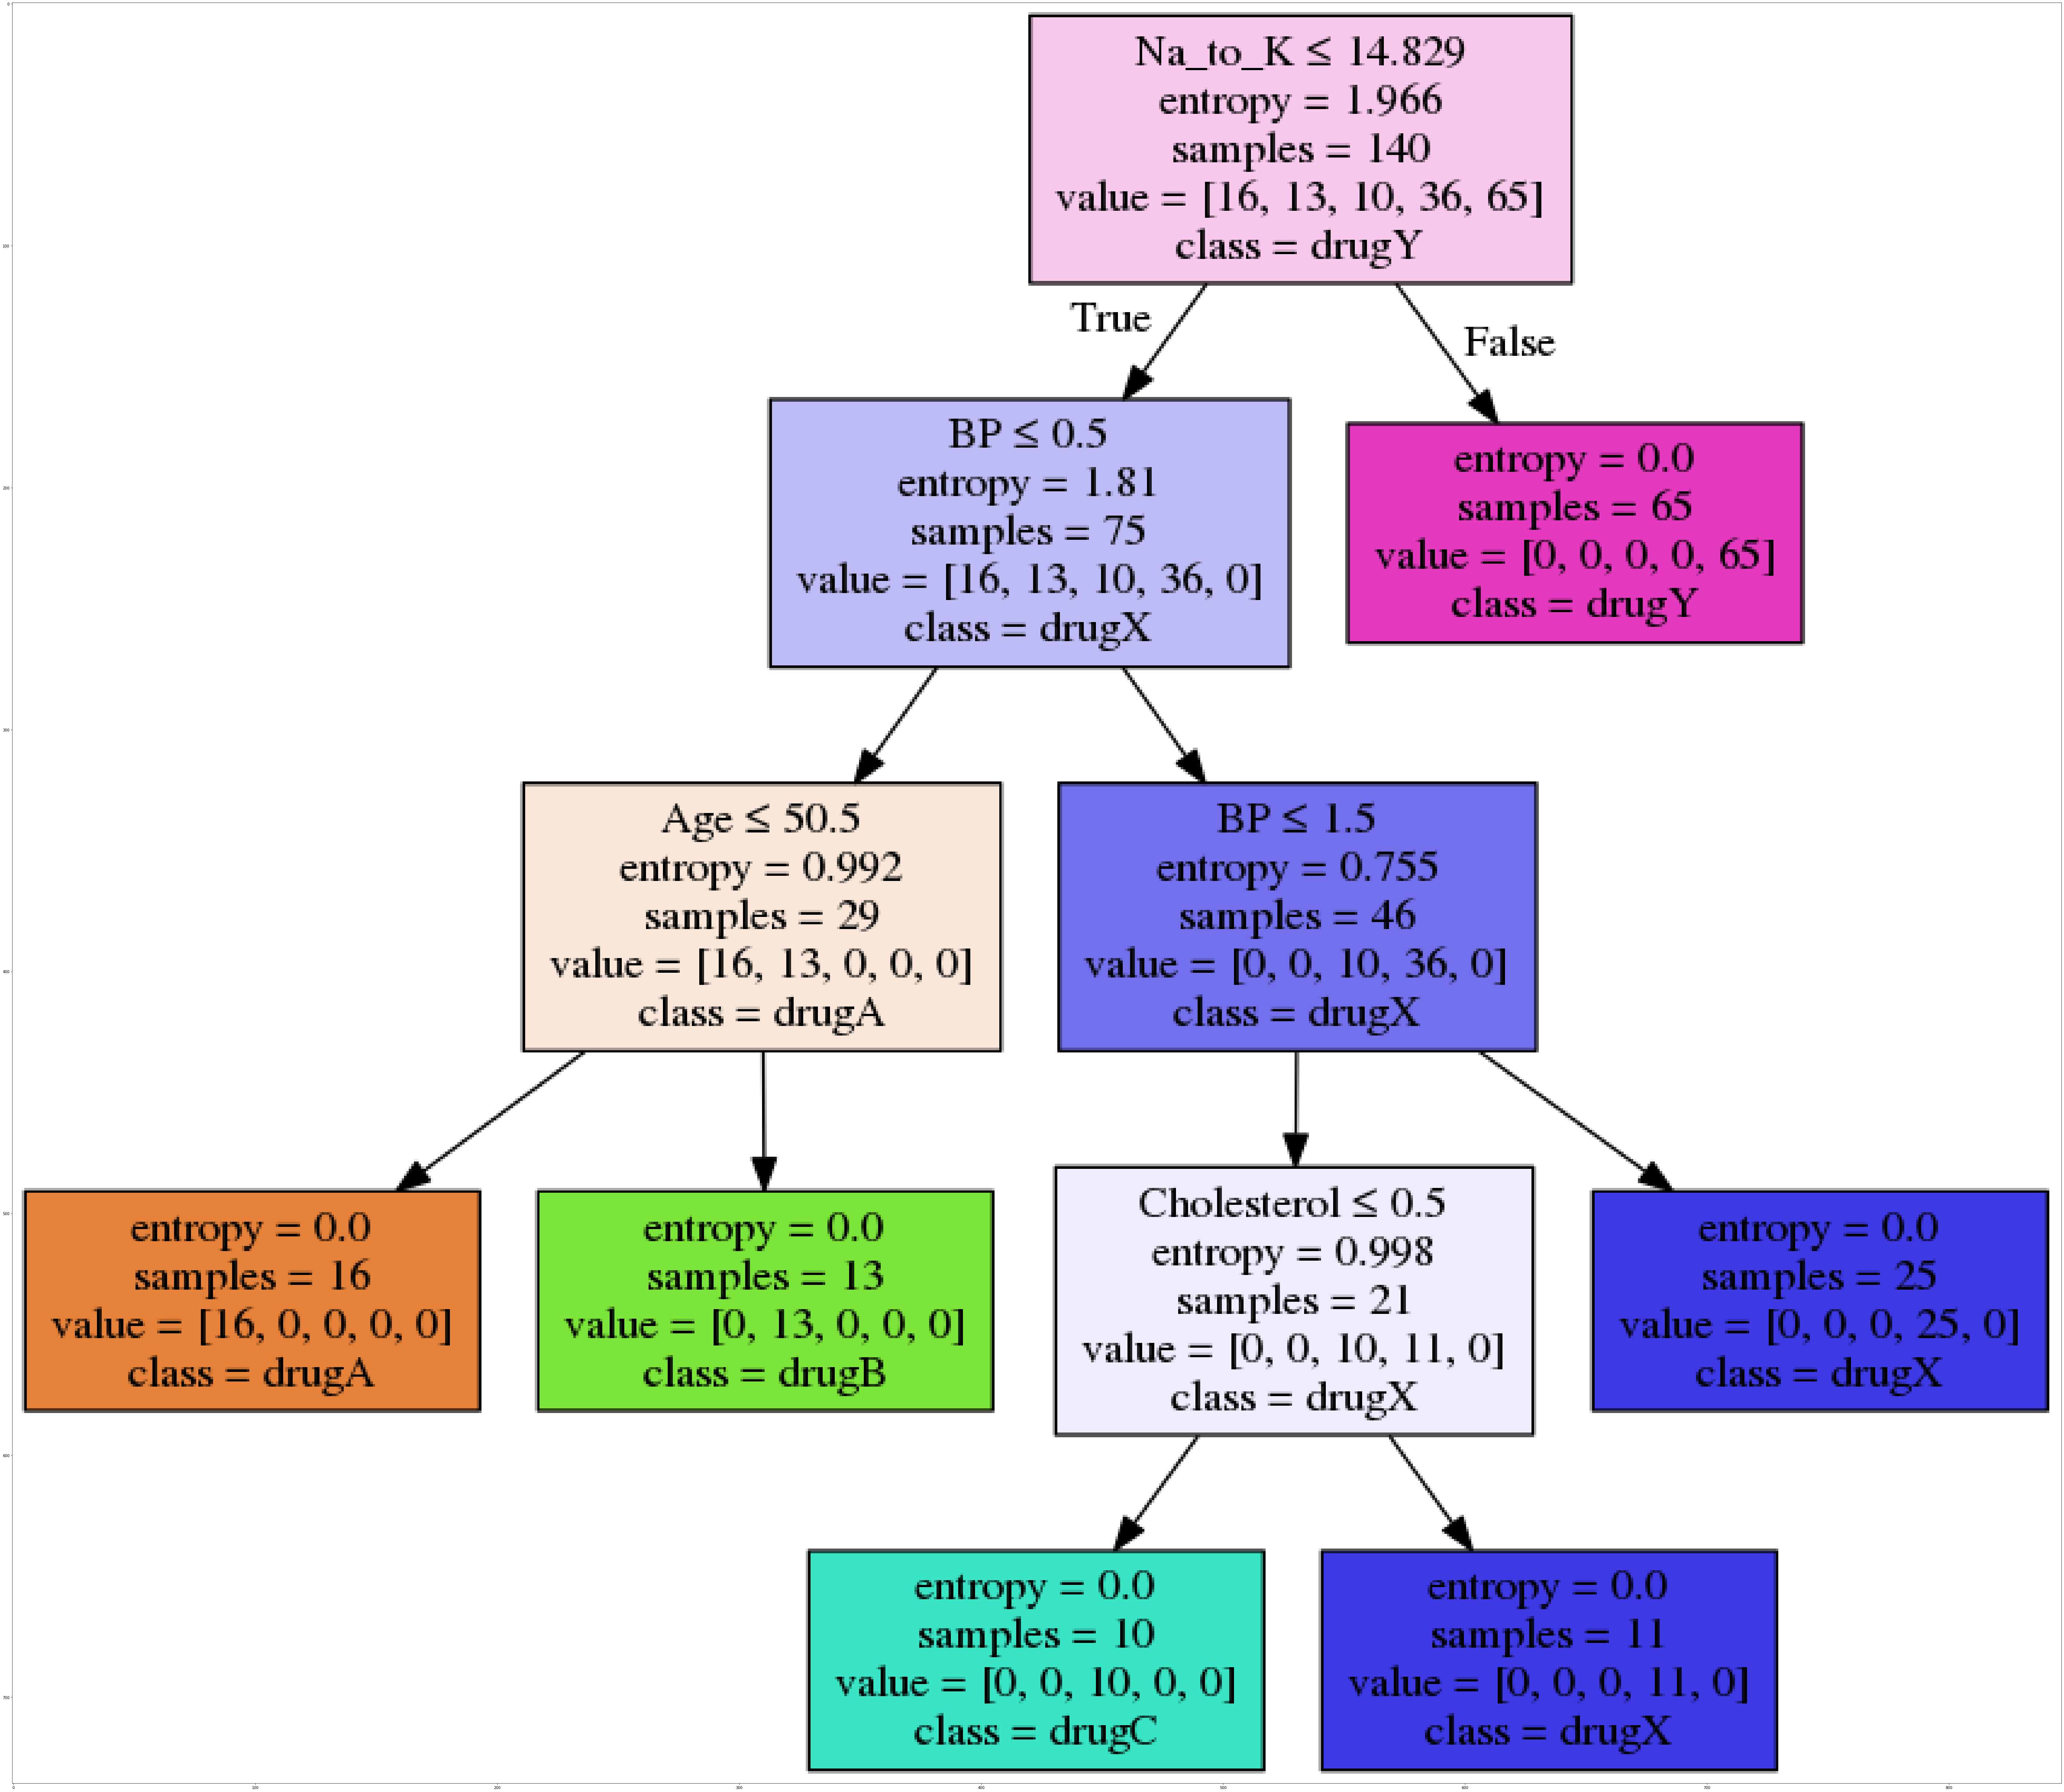

In [97]:
dot_data = StringIO()
filename = "dataset/drugtree.png"

featureNames = df.columns[0:5]
out=tree.export_graphviz(drug_tree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest') 

In [84]:
# let's try 
from sklearn.model_selection import cross_val_score
drug_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
result = cross_val_score(drug_tree, X, Y, cv=10)
result

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 0.95, 1.  ])